In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
unemployment_df = pd.read_csv("data/unemployment_data.csv", skiprows=4)

In [4]:
unemployment_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806411,7.772705,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.416000,18.603000,17.584000,17.202000,17.953000,18.287000,17.363000,17.091000,17.086000,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.536000,27.035000,26.906000,28.468000,29.217000,34.007000,33.268000,32.098000,33.168000,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.239000,4.529000,5.033000,5.542000,6.033000,5.199000,5.995000,5.905000,5.961000,NaN


In [18]:
years_to_keep = [str(y) for y in range(1991, 2024)]
unemployment_df = unemployment_df[
    ["Country Name"] + years_to_keep
]

In [19]:
unemployment_df

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,7.783654,7.812734,7.849878,...,6.947011,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806411
2,Afghanistan,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,7.863000,7.890000,7.903000,...,7.915000,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000
3,Africa Western and Central,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,4.313735,4.324049,4.512158,...,3.881396,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245
4,Angola,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,16.172000,16.371000,16.593000,...,16.406000,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",8.409000,8.342000,8.344000,8.340000,8.988000,9.585000,10.223000,10.829000,11.460000,...,13.467000,17.900000,18.416000,18.603000,17.584000,17.202000,17.953000,18.287000,17.363000,17.091000
263,South Africa,23.002000,23.262000,23.179000,22.942000,22.647000,22.480000,22.518000,22.673000,22.791000,...,24.890000,25.149000,26.536000,27.035000,26.906000,28.468000,29.217000,34.007000,33.268000,32.098000
264,Zambia,18.900000,19.544000,19.700000,18.648000,16.828000,15.300000,13.305000,12.000000,12.495000,...,6.571000,5.942000,5.239000,4.529000,5.033000,5.542000,6.033000,5.199000,5.995000,5.905000


In [7]:
school_enrollment_teritory_df = pd.read_csv("data/school_enrollment_teritory_data.csv", skiprows=3)

In [8]:
school_enrollment_teritory_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,17.141621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.065542,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.573140,8.712690,8.750930,8.672730,8.711870,8.661860,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.995920,NaN,10.854360,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.269370,9.397760,9.588990,9.738760,9.935380,10.190260,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.782877,NaN,NaN,NaN,NaN,NaN,NaN,10.049358,9.954907,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,18.929298,21.090291,22.351543,22.244247,22.614874,22.343129,23.727104,23.493769,NaN,NaN
264,Zambia,ZMB,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
years_to_keep = [str(y) for y in range(1991, 2024)]
school_enrollment_teritory_df = school_enrollment_teritory_df[
    ["Country Name"] + years_to_keep
]

In [21]:
school_enrollment_teritory_df

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.751900,16.731239,17.141621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,3.32539,3.44453,3.58261,3.75828,3.77903,3.79064,3.81873,3.85900,3.82158,...,8.291040,8.434000,8.573140,8.712690,8.750930,8.672730,8.711870,8.661860,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.397640,NaN,NaN,NaN,9.995920,NaN,10.854360,NaN,NaN,NaN
3,Africa Western and Central,2.97763,3.11691,3.29300,3.45101,3.59402,3.78766,4.01411,4.16987,4.33807,...,9.392180,9.453030,9.269370,9.397760,9.588990,9.738760,9.935380,10.190260,NaN,NaN
4,Angola,0.60506,0.57333,NaN,NaN,NaN,NaN,NaN,0.61365,0.55463,...,NaN,8.783209,9.782877,NaN,NaN,NaN,NaN,NaN,NaN,10.049358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,3.99025,NaN,NaN,NaN,NaN,3.97207,NaN,9.01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,11.84507,12.32732,13.62330,15.70450,NaN,NaN,NaN,NaN,NaN,...,18.481336,19.033295,18.929298,21.090291,22.351543,22.244247,22.614874,22.343129,23.727104,23.493769
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.39900,2.38266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1991          235 non-null    float64
 2   1992          235 non-null    float64
 3   1993          235 non-null    float64
 4   1994          235 non-null    float64
 5   1995          235 non-null    float64
 6   1996          235 non-null    float64
 7   1997          235 non-null    float64
 8   1998          235 non-null    float64
 9   1999          235 non-null    float64
 10  2000          235 non-null    float64
 11  2001          235 non-null    float64
 12  2002          235 non-null    float64
 13  2003          235 non-null    float64
 14  2004          235 non-null    float64
 15  2005          235 non-null    float64
 16  2006          235 non-null    float64
 17  2007          235 non-null    float64
 18  2008          235 non-null    

In [24]:
print(school_enrollment_teritory_df.isnull().sum())

Country Name      0
1991            172
1992            172
1993            180
1994            186
1995            181
1996            186
1997            201
1998            198
1999            144
2000            112
2001            106
2002             94
2003             94
2004             95
2005             98
2006             98
2007            101
2008             94
2009             90
2010             85
2011             82
2012             78
2013             89
2014             83
2015             73
2016             85
2017             85
2018             88
2019             90
2020             90
2021             98
2022            105
2023            105
dtype: int64


In [26]:
unemp_long_df = unemployment_df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Unemployment_rate"
)

In [27]:
unemp_long_df

,Country Name,Year,Unemployment_rate
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,8.179629
2,Afghanistan,1991,8.070000
3,Africa Western and Central,1991,4.158680
4,Angola,1991,16.855000
...,...,...,...
8773,Kosovo,2023,NaN
8774,"Yemen, Rep.",2023,17.091000
8775,South Africa,2023,32.098000
8776,Zambia,2023,5.905000


In [32]:
edu_long_df = school_enrollment_teritory_df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Education_level"
)

In [33]:
edu_long_df

,Country Name,Year,Education_level
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,3.325390
2,Afghanistan,1991,NaN
3,Africa Western and Central,1991,2.977630
4,Angola,1991,0.605060
...,...,...,...
8773,Kosovo,2023,NaN
8774,"Yemen, Rep.",2023,NaN
8775,South Africa,2023,23.493769
8776,Zambia,2023,NaN


In [34]:
unemp_long_df["Year"] = unemp_long_df["Year"].astype(str)
edu_long_df["Year"] = edu_long_df["Year"].astype(str)

In [35]:
merged_df = unemp_long_df.merge(
    edu_long_df,
    on=["Country Name", "Year"],
    how="inner"
)

In [36]:
merged_df

,Country Name,Year,Unemployment_rate,Education_level
0,Aruba,1991,NaN,NaN
1,Africa Eastern and Southern,1991,8.179629,3.325390
2,Afghanistan,1991,8.070000,NaN
3,Africa Western and Central,1991,4.158680,2.977630
4,Angola,1991,16.855000,0.605060
...,...,...,...,...
8773,Kosovo,2023,NaN,NaN
8774,"Yemen, Rep.",2023,17.091000,NaN
8775,South Africa,2023,32.098000,23.493769
8776,Zambia,2023,5.905000,NaN


In [37]:
merged_df.duplicated(subset=["Country Name", "Year"]).sum()

np.int64(0)

In [38]:
merged_df = merged_df[~merged_df["Country Name"].str.contains(
    "World|income|Asia|Africa|Europe|OECD|Arab",
    case=False,
    na=False
)]

In [39]:
merged_df

,Country Name,Year,Unemployment_rate,Education_level
0,Aruba,1991,NaN,NaN
2,Afghanistan,1991,8.070,NaN
4,Angola,1991,16.855,0.605060
5,Albania,1991,10.304,NaN
6,Andorra,1991,NaN,NaN
...,...,...,...,...
8772,Samoa,2023,4.977,14.610664
8773,Kosovo,2023,NaN,NaN
8774,"Yemen, Rep.",2023,17.091,NaN
8776,Zambia,2023,5.905,NaN


In [46]:
merged_df = merged_df[merged_df["Year"].astype(int) >= 2000]
analysis_df = merged_df[
    ["Country Name", "Year", "Unemployment_rate", "Education_level"]
].dropna()

In [47]:
analysis_df

,Country Name,Year,Unemployment_rate,Education_level
2403,Argentina,2000,15.000,54.084351
2404,Armenia,2000,11.095,32.530521
2410,Burundi,2000,3.129,1.054750
2411,Belgium,2000,6.586,56.201832
2412,Benin,2000,0.864,3.496050
...,...,...,...,...
8758,Tanzania,2023,2.582,5.168878
8762,Uruguay,2023,8.355,79.953690
8764,Uzbekistan,2023,4.460,45.759177
8769,Viet Nam,2023,1.645,32.841513


In [50]:
analysis_df.isnull().sum()

Country Name         0
Year                 0
Unemployment_rate    0
Education_level      0
dtype: int64

In [51]:
corr_pearson = analysis_df["Unemployment_rate"].corr(
    analysis_df["Education_level"],
    method="pearson"
)

corr_pearson

np.float64(0.05852424596577725)

In [52]:
print(corr_pearson)

0.05852424596577725


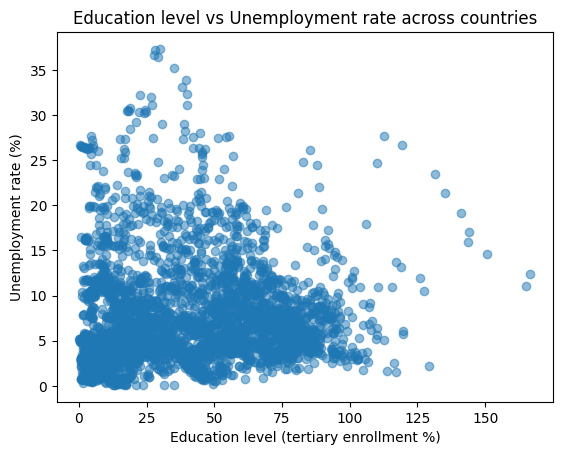

In [53]:
plt.scatter(
    analysis_df["Education_level"],
    analysis_df["Unemployment_rate"],
    alpha=0.5
)

plt.xlabel("Education level (tertiary enrollment %)")
plt.ylabel("Unemployment rate (%)")
plt.title("Education level vs Unemployment rate across countries")

plt.show()

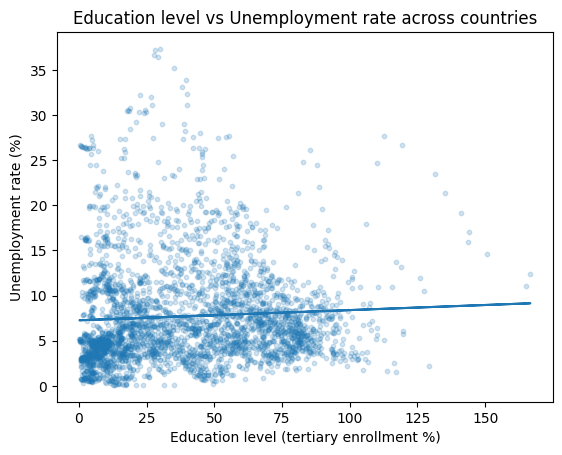

In [58]:
x = analysis_df["Education_level"]
y = analysis_df["Unemployment_rate"]

coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

plt.scatter(x, y, alpha=0.2, s=10)
plt.plot(x, trend(x))
plt.xlabel("Education level (tertiary enrollment %)")
plt.ylabel("Unemployment rate (%)")
plt.title("Education level vs Unemployment rate across countries")
plt.show()